In [38]:
import pandas as pd
import numpy as np

df=pd.read_excel('C:\\Users\91978\\Desktop\\inflation_prediction_project\\Model_building\\Model_formulation\\combine_dataset.xlsx',index_col='Date',parse_dates=True)

In [39]:
df.head()

,Broad_Money(M3)(%),cpi_index,exchange_rate,GDP % Change,reverse_repo_rate,Unemployment Rate (%),Repo_Rate,Inflation
Date,,,,,,,,
2000-07-01,0.1504,36.897875,44.8405,1.300000,8.0,7.744583,10.00,5.0
2000-08-01,0.1523,36.732042,45.7687,0.866667,13.5,7.749667,15.00,4.0
2000-09-01,0.1488,36.814958,45.9680,0.433333,10.0,7.754750,13.50,3.5
2000-10-01,0.1416,37.229541,46.4252,0.000000,8.0,7.759833,10.25,2.7
2000-11-01,0.1505,37.312458,46.8214,0.166667,8.0,7.764917,10.00,2.7


In [40]:
df.columns

Index(['Broad_Money(M3)(%)', 'cpi_index', 'exchange_rate', 'GDP % Change',
       'reverse_repo_rate', 'Unemployment Rate (%)', 'Repo_Rate', 'Inflation'],
      dtype='object')

In [41]:
df.iloc[:280].isnull().sum()
data=df.iloc[:280]

In [42]:
print(df.isnull().sum())
print(df.shape)

Broad_Money(M3)(%)       2630
cpi_index                2630
exchange_rate            2630
GDP % Change             2630
reverse_repo_rate        2342
Unemployment Rate (%)    2549
Repo_Rate                2630
Inflation                2630
dtype: int64
(2910, 8)


In [43]:
data.shape

(280, 8)

## Regression

In [77]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features (X) and target variable (y)
X = data[['Broad_Money(M3)(%)', 'cpi_index', 'exchange_rate', 'GDP % Change', 
          'reverse_repo_rate', 'Unemployment Rate (%)', 'Repo_Rate']]
y = data['Inflation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 7.452989787467431
R-squared Score: 0.19528669792326736


## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree regression model
model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.4560714285714287
R-squared Score: 0.9507571114768322


## LSTM

In [79]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Reshape the input data to 3D for LSTM input (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test).flatten()  # Flatten y_pred to match the shape of y_test
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Epoch 1/100


c:\Users\91978\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 48.4359
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 49.0366 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.0568 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.8170 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.8787 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37.1044 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36.6475 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.0791 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.7590 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.8405 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.4197 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9284 
Epoch 13/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.2014 
Epoch 14/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9637 
Epoch 15/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1694 
Epoch 16/100
8/8 ━━

# Time Sereis (ARIMA)

<Axes: xlabel='Date'>

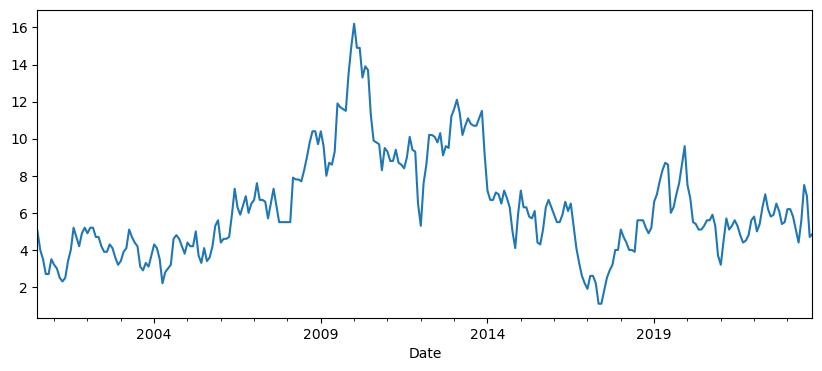

In [80]:
data['Inflation'].plot(figsize=(10,4))

In [81]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data['Inflation'])

1. ADF :  -1.7050010701923202
2. P-Value :  0.4285376346225096
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 267
5. Critical Values :
	 1% :  -3.4550813975770827
	 5% :  -2.8724265892710914
	 10% :  -2.5725712007462582


In [82]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['Inflation'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=675.596, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=689.808, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=684.740, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=682.061, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=687.808, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=676.437, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=674.278, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=682.786, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=677.524, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=675.946, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=675.638, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=661.190, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=662.131, Time=0.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=662.246, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=660.3

In [83]:
train=data.iloc[:260]
test=data.iloc[-20:]
print(train.shape,test.shape)

(260, 8) (20, 8)


In [84]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
model = ARIMA(train['Inflation'], order=(2, 1, 3))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  260
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -298.285
Date:                Sun, 07 Apr 2024   AIC                            608.569
Time:                        04:23:11   BIC                            629.910
Sample:                    07-01-2000   HQIC                           617.150
                         - 02-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4389      0.035     41.065      0.000       1.370       1.508
ar.L2         -0.9424      0.034    -27.860      0.000      -1.009      -0.876
ma.L1         -1.3518      0.079    -17.178      0.0

In [85]:
start=len(train)
end=len(train)+len(test)-1
pred=model_fit.predict(start=start,end=end,type='levels')
print(pred)

2022-03-01    4.472743
2022-04-01    4.004046
2022-05-01    3.728260
2022-06-01    3.773133
2022-07-01    4.097608
2022-08-01    4.522218
2022-09-01    4.827413
2022-10-01    4.866408
2022-11-01    4.634895
2022-12-01    4.265015
2023-01-01    3.950963
2023-02-01    3.847645
2023-03-01    3.994946
2023-04-01    4.304273
2023-05-01    4.610554
2023-06-01    4.759758
2023-07-01    4.685806
2023-08-01    4.438781
2023-09-01    4.153022
2023-10-01    3.974634
Freq: MS, Name: predicted_mean, dtype: float64


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Date'>

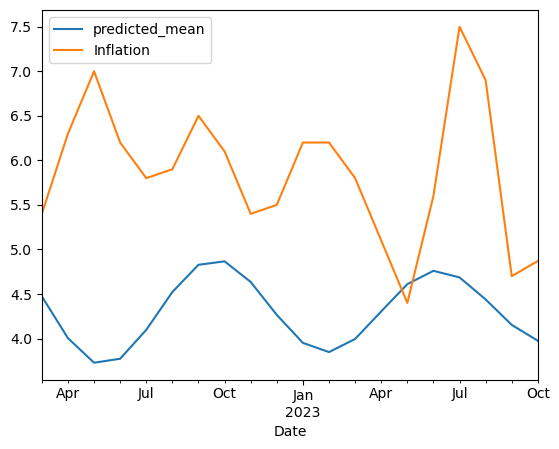

In [86]:
pred.plot(legend=True)
test['Inflation'].plot(legend=True)

In [87]:
test['Inflation'].mean()

5.868500000000001

In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Inflation'].mean()
rmse=sqrt(mean_squared_error(pred,test['Inflation']))
print(rmse)

1.7925275411354946


In [89]:
model2=ARIMA(data['Inflation'],order=(2,1,3))
model2=model2.fit()
data.tail()

c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Broad_Money(M3)(%),cpi_index,exchange_rate,GDP % Change,reverse_repo_rate,Unemployment Rate (%),Repo_Rate,Inflation
Date,,,,,,,,
2023-06-01,0.095,150.280067,82.2252,1.966667,3.35,8.1,6.5,5.60
2023-07-01,0.101,153.915875,82.1565,1.900000,3.35,7.6,6.5,7.50
2023-08-01,0.106,153.364995,82.8122,1.833333,3.35,7.8,6.5,6.90
2023-09-01,0.107,151.492003,83.0700,1.766667,3.35,7.1,6.5,4.70
2023-10-01,0.109,152.483587,83.2162,1.700000,3.35,7.8,6.5,4.87


## Prediction from Arima model

In [96]:
index_future_dates=pd.date_range(start='2023-10-01',end='2024-4-01',freq='MS')
pred=model2.predict(start=len(df),end=len(df)+6,typ='levels').rename('ARIMA Prediction')
pred.index=index_future_dates
print(pred)

2023-10-01    5.149728
2023-11-01    5.149728
2023-12-01    5.149728
2024-01-01    5.149728
2024-02-01    5.149728
2024-03-01    5.149728
2024-04-01    5.149728
Freq: MS, Name: ARIMA Prediction, dtype: float64


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

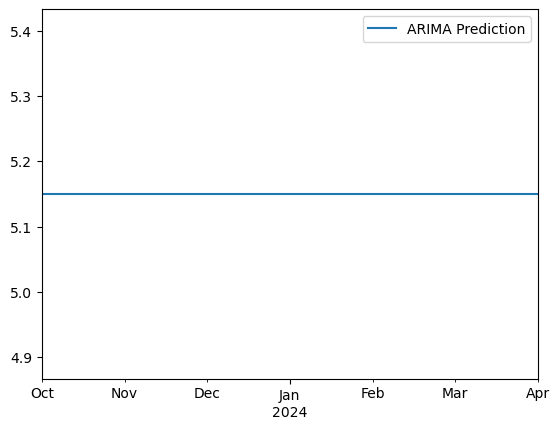

In [97]:
pred.plot(legend=True)

## Implemnetation using SARIMAX

In [99]:
from pmdarima import auto_arima

# Perform auto ARIMA with seasonal=True
stepwise_fit_se = auto_arima(data['Inflation'], seasonal=True, trace=True, suppress_warnings=True)

# Print the summary of the best model
print(stepwise_fit_se.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=675.596, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=689.808, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=684.740, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=682.061, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=687.808, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=676.437, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=674.278, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=682.786, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=677.524, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=675.946, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=675.638, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=661.190, Time=0.49 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=662.131, Time=0.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=662.246, Time=0.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=660.3

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model with the specified parameters
order = (2, 1, 3)  # Non-seasonal ARIMA order
seasonal_order = (0, 0, 0, 0)  # Seasonal ARIMA order
sarima_model = SARIMAX(data['Inflation'], order=order, seasonal_order=seasonal_order)

# Fit the SARIMA model
sarima_fit = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_fit.summary())


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  280
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -323.197
Date:                Sun, 07 Apr 2024   AIC                            658.395
Time:                        04:34:16   BIC                            680.182
Sample:                    07-01-2000   HQIC                           667.135
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4216      0.041     34.538      0.000       1.341       1.502
ar.L2         -0.9125      0.039    -23.431      0.000      -0.989      -0.836
ma.L1         -1.3150      0.079    -16.665      0.0

In [102]:
start=len(train)
end=len(train)+len(test)-1
pred_sarima=sarima_fit.predict(start=start,end=end,type='levels')
print(pred_sarima)

2022-03-01    4.525310
2022-04-01    5.132559
2022-05-01    6.096835
2022-06-01    6.862854
2022-07-01    6.063994
2022-08-01    6.067918
2022-09-01    6.344313
2022-10-01    6.905487
2022-11-01    6.107697
2022-12-01    5.235104
2023-01-01    5.350587
2023-02-01    6.019340
2023-03-01    5.893276
2023-04-01    5.620861
2023-05-01    5.130821
2023-06-01    4.668112
2023-07-01    6.175340
2023-08-01    7.801329
2023-09-01    6.482094
2023-10-01    4.154023
Freq: MS, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

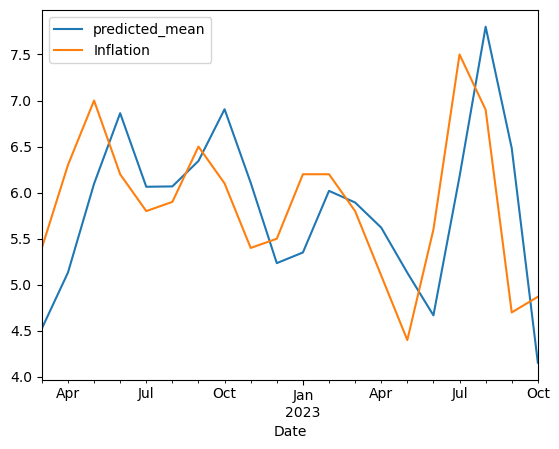

In [103]:
pred_sarima.plot(legend=True)
test['Inflation'].plot(legend=True)

In [104]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Inflation'].mean()
rmse=sqrt(mean_squared_error(pred_sarima,test['Inflation']))
print(rmse)

0.8190628343316507


In [106]:
model2_sarima=ARIMA(data['Inflation'],order=(2,1,3))
model2_sarima=model2_sarima.fit()


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [109]:
index_future_dates=pd.date_range(start='2023-10-01',end='2024-12-01',freq='MS')
pred1=model2_sarima.predict(start=len(df),end=len(df)+14,typ='levels').rename('SARIMA Prediction')
pred1.index=index_future_dates
print(pred1)

2023-10-01    5.149728
2023-11-01    5.149728
2023-12-01    5.149728
2024-01-01    5.149728
2024-02-01    5.149728
2024-03-01    5.149728
2024-04-01    5.149728
2024-05-01    5.149728
2024-06-01    5.149728
2024-07-01    5.149728
2024-08-01    5.149728
2024-09-01    5.149728
2024-10-01    5.149728
2024-11-01    5.149728
2024-12-01    5.149728
Freq: MS, Name: SARIMA Prediction, dtype: float64


c:\Users\91978\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

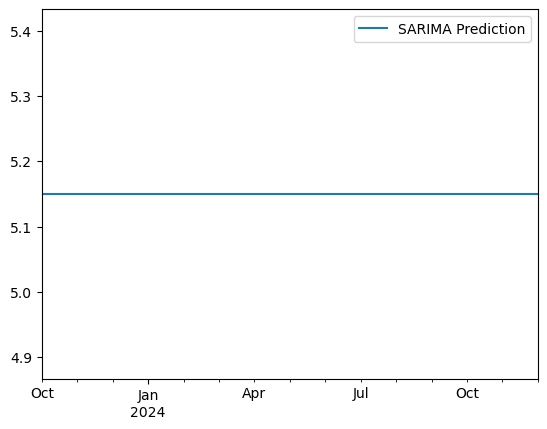

In [110]:
pred1.plot(legend=True)